In [2]:
# IMPORTING USEFUL LIBRARIES 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# IMPORTING AND READING DATASET
# MATCHES
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
# IMPORTING AND READING DATASET
# DELIVERIES
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
# DATA PREPROCESSING AND CLEANING FOR MATCHES.CSV
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
# SO HERE THERE ARE MANY MISSING VALUES IN UMPIRE3 AND SO WE REMOVE IT.
matches.drop('umpire3',axis = 1, inplace=True)

In [10]:
# DATA PREPROCESSING AND CLEANING FOR DELIVERIES.CSV
deliveries.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs              0
player_dismissed    58831
dismissal_kind      58831
fielder             59696
dtype: int64

In [11]:

# EVEN THOUGH DISMISSALS HAVE MANY MISSING VALUES BUT IT IS DUE TO FACT THAT DISMISSALS IN CRICKET ARE NOT SURE TO HAPPEN.

In [12]:
# NOW CLEANING THE COLUMNS IN CASE OF ANY REPEATED OR SIMILAR ENTRIES :-
matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
matches["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
deliveries["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [15]:
deliveries["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

In [16]:
# OBSERVATION : RISING PUNE SUPERGIANTS IS SAME AS RISING PUNE SUPERGIANT , AND SO WE REPLACE IT.
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [17]:
matches["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [18]:
# OBSERVATION : BENGALURU IS SAME AS BANGALORE AND SO WE REPLACE IT.
matches.replace('Bangalore','Bengaluru', inplace=True)

In [19]:
# PERFORMING EXPLORATORY ANALYSIS AND DATA VISUALIZATION USING PLOTS AND CHARTS

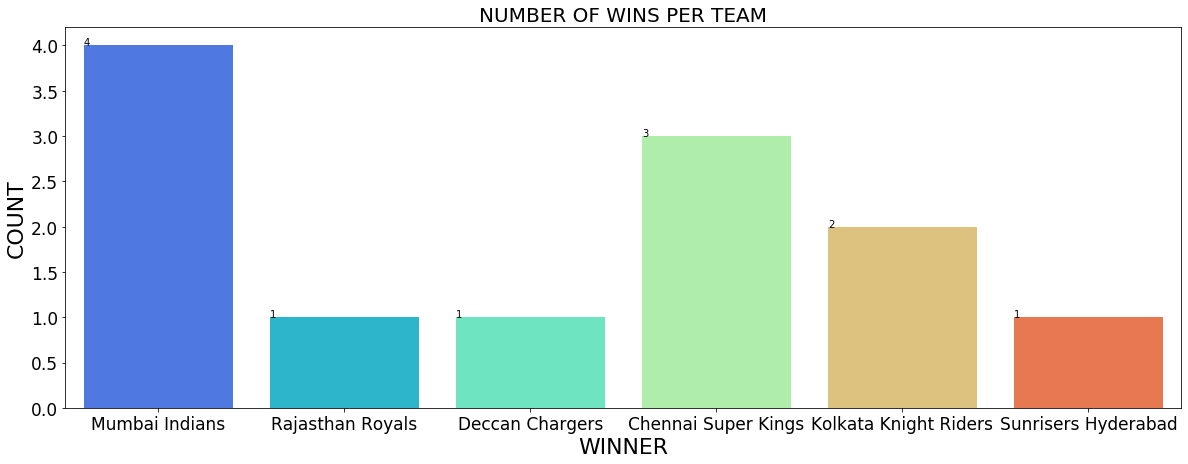

In [20]:
plt.subplots(figsize=(20,7))
season_winner = matches.drop_duplicates('season', keep='last')
ax=sns.countplot(x='winner', data=season_winner, palette = 'rainbow')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("NUMBER OF WINS PER TEAM",fontsize=20)
plt.xlabel("WINNER",fontsize=22)
plt.ylabel('COUNT',fontsize=22)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

In [21]:
# OBSERVATION : MUMBAI INDIANS IS MOST SUCCESSFUL TEAM FOLLOWED BY CHENNAI SUPER KINGS.

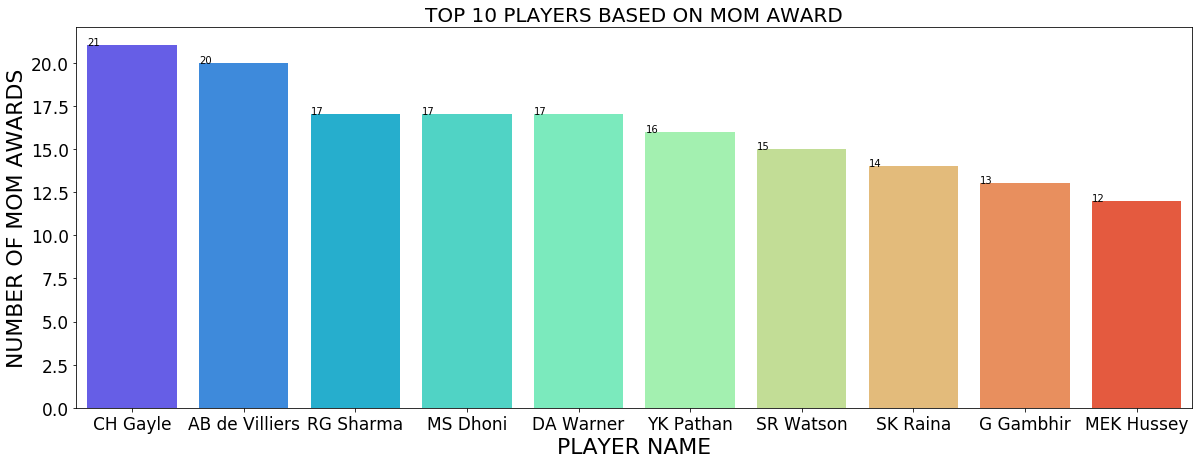

In [22]:

plt.subplots(figsize=(20,7))
ax = sns.barplot(x = matches['player_of_match'].value_counts()[:10].index, y = matches['player_of_match'].value_counts()[:10],palette = 'rainbow')
plt.ylabel('NUMBER OF MOM AWARDS',fontsize=22)
plt.xlabel('PLAYER NAME',fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('TOP 10 PLAYERS BASED ON MOM AWARD',fontsize=20)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [23]:
# OBSERVATION : CH GAYLE HAS THE MOST MOM AWARDS FOLLOWED BY AB DE VILLIERS.

In [24]:
defending = matches['win_by_runs'].value_counts()
defending.sort_values(ascending=False)

0      419
14      13
4       11
10      11
1       10
      ... 
62       1
87       1
60       1
130      1
118      1
Name: win_by_runs, Length: 89, dtype: int64

In [25]:
chasing = matches['win_by_wickets'].value_counts()
chasing.sort_values(ascending=False)

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

In [26]:
len(matches)

756

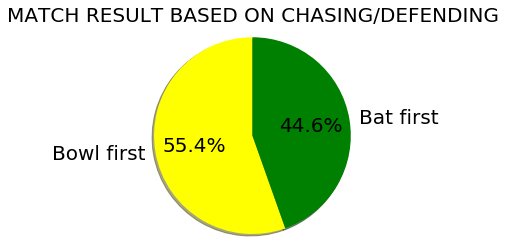

In [27]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
match=matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['yellow', 'green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90,textprops={'fontsize': 20})
plt.title('MATCH RESULT BASED ON CHASING/DEFENDING',fontsize=20)
plt.axis('equal')
plt.show()

In [28]:
# OBSERVATION : CHASING RESULTED IN MORE NUMBER OF WINS THAN DEFENDING THE SCORE. (CHASING - 55.4% WIN , DEFENDING - 44.6% WIN).

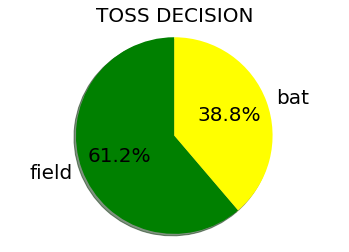

In [29]:
toss=matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['green', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90, textprops={'fontsize': 20})
plt.title('TOSS DECISION',fontsize=20)
plt.axis('equal')
plt.show()

In [30]:
# OBSERVATION : WHEN THE TOSS IS WON BY A TEAM , IT CHOOSES TO FIELD FIRST (61.2%) RATHER THAN TO BAT FIRST (38.8%).

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


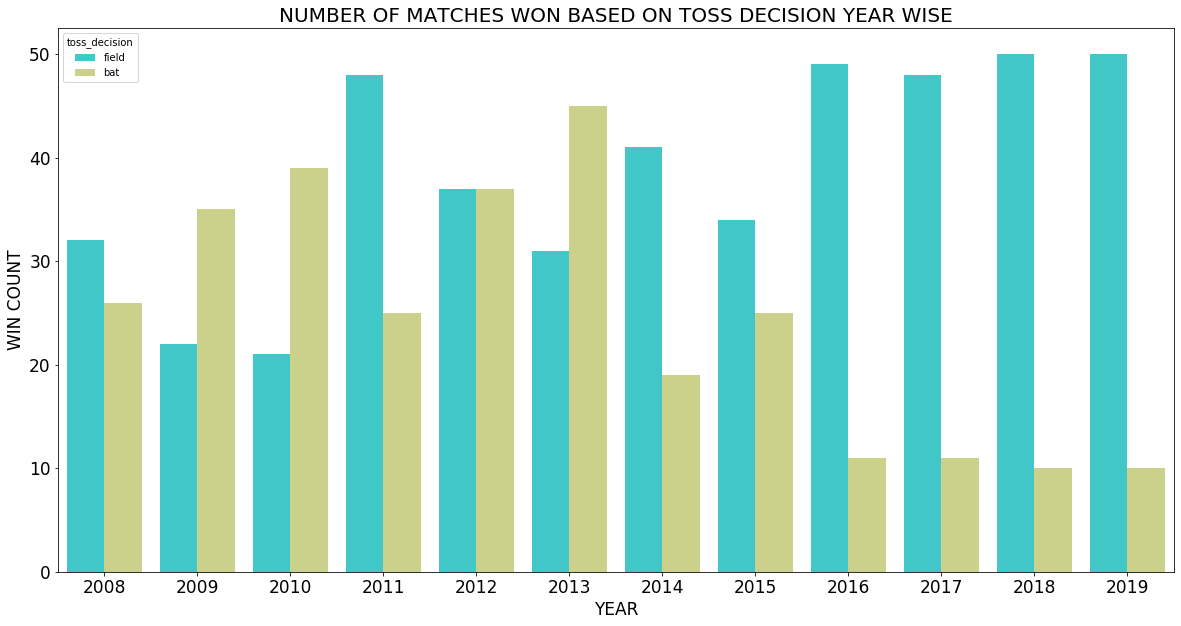

In [31]:

plt.figure(figsize = (20,10))
sns.countplot('season',hue='toss_decision',data=matches,palette='rainbow')
plt.title("NUMBER OF MATCHES WON BASED ON TOSS DECISION YEAR WISE",fontsize=20)
plt.xlabel("YEAR",fontsize=17)
plt.ylabel("WIN COUNT",fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [32]:
# OBSERVATION : NUMBER OF WIN COUNT IS MORE WHEN A TEAM DECIDES TO FIELD FIRST ON WINNING THE TOSS.

In [33]:
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner', 'toss_winner']].reset_index(drop=True).sort_values('season')

,season,winner,toss_winner
1,2008,Rajasthan Royals,Rajasthan Royals
2,2009,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Chennai Super Kings
4,2011,Chennai Super Kings,Chennai Super Kings
5,2012,Kolkata Knight Riders,Chennai Super Kings
6,2013,Mumbai Indians,Mumbai Indians
7,2014,Kolkata Knight Riders,Kolkata Knight Riders
8,2015,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
0,2017,Mumbai Indians,Mumbai Indians


In [34]:
# OBSERVATION : IF A TEAM WINS THE TOSS , IT WINS THE MATCH MORE AS COMPARED TO WHEN IT LOOSES THE TOSS.

In [35]:
# NOW WE MOVE ON TO INDIVIDUAL PLAYER PERFORMANCE

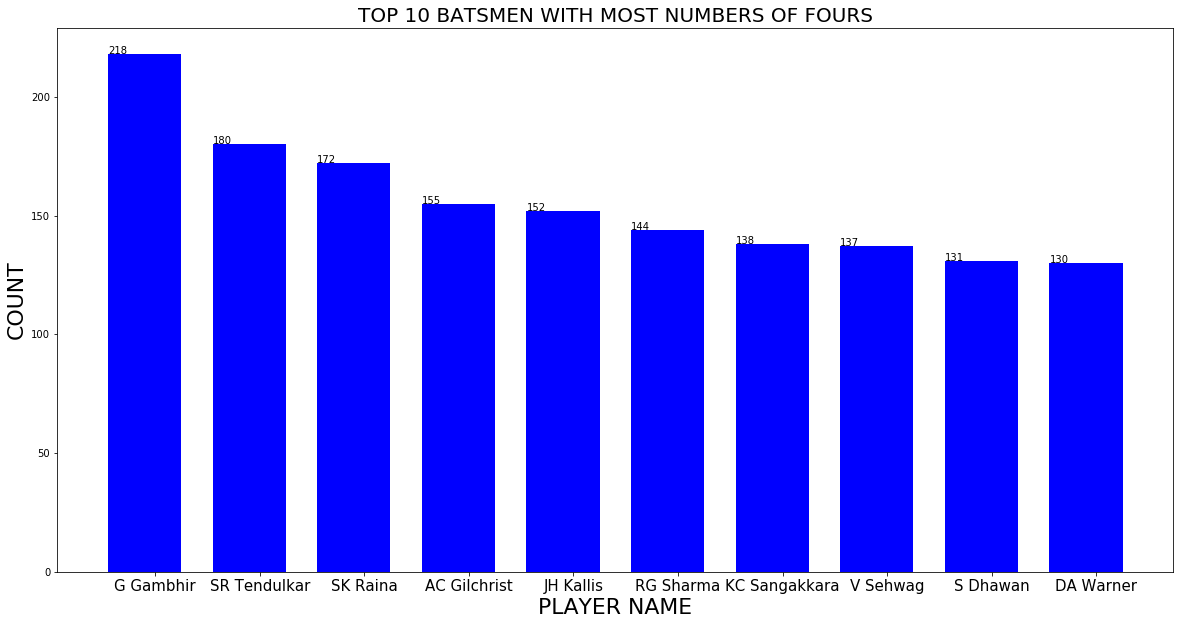

In [36]:
batsman_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT",fontsize=22)
ax.set_xlabel("PLAYER NAME",fontsize=22)
ax.set_title("TOP 10 BATSMEN WITH MOST NUMBERS OF FOURS",fontsize = 20)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [37]:
# OBSERVATION : S DHAWAN HAS SCORED MOST NUMBER OF FOURS FOLLOWED BY SK RAINA.

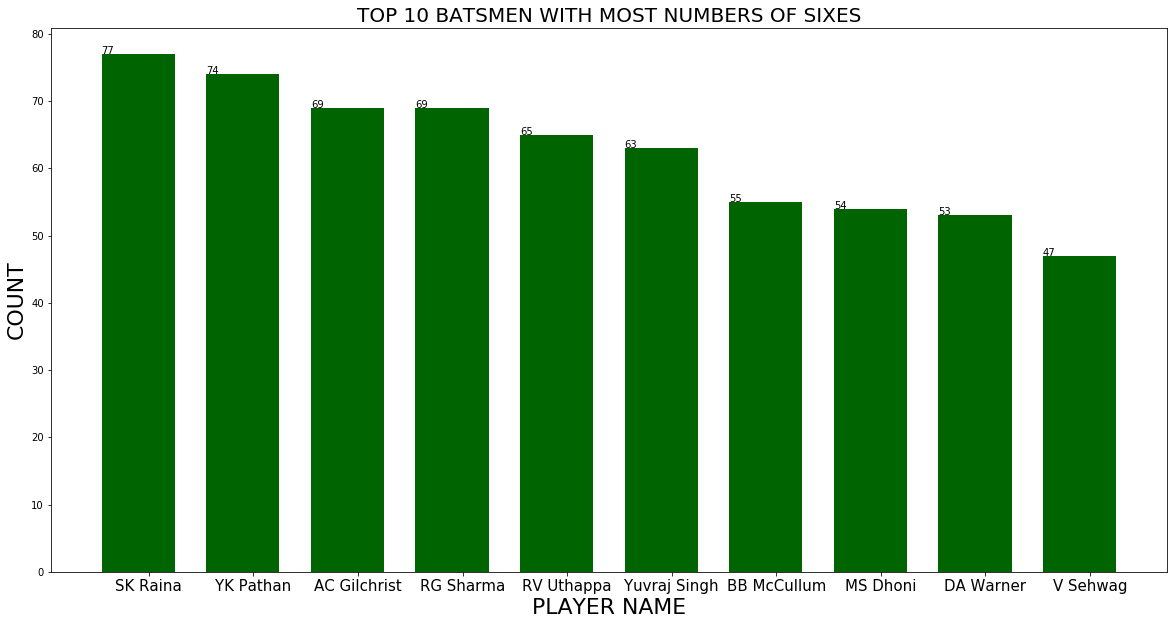

In [38]:
batsman_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='darkgreen')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT",fontsize=22)
ax.set_xlabel("PLAYER NAME",fontsize=22)
ax.set_title("TOP 10 BATSMEN WITH MOST NUMBERS OF SIXES",fontsize = 20)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [39]:
# OBSERVATION : CH GAYLE HAS SCORED MOST NUMBER OF SIXES FOLLOWED BY AB DE VILLIERS.

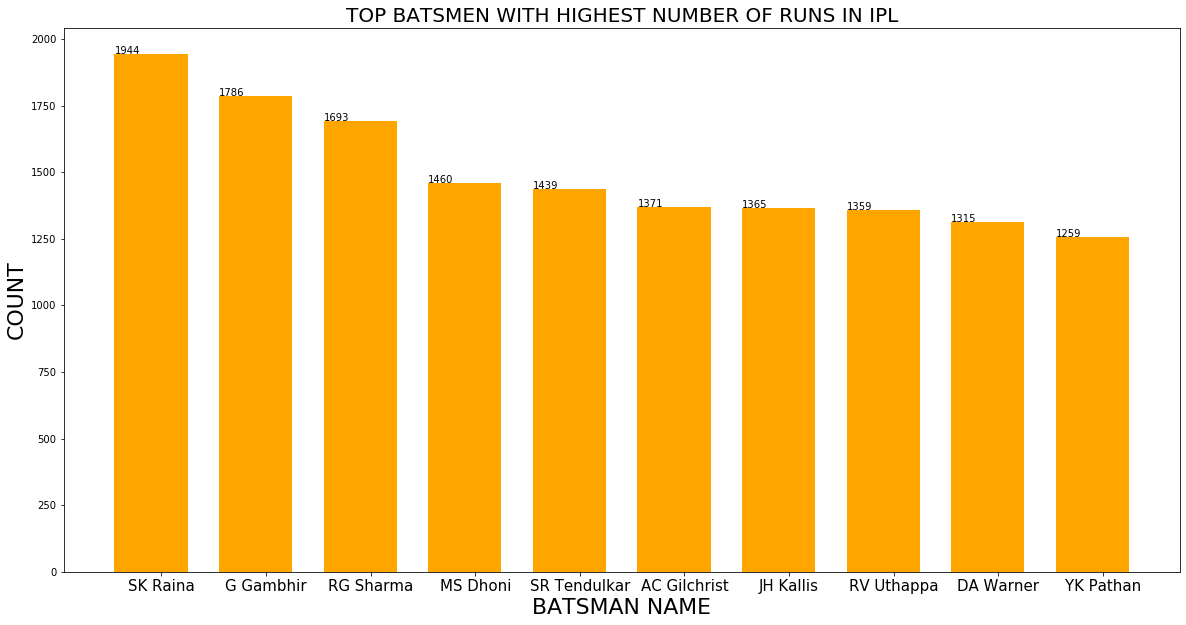

In [40]:

batsman_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT",fontsize=22)
ax.set_xlabel("BATSMAN NAME",fontsize=22)
ax.set_title("TOP BATSMEN WITH HIGHEST NUMBER OF RUNS IN IPL",fontsize = 20)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [41]:
# OBSERVATION : V KOHLI HAS MOST NUMBER OF RUNS IN IPL FOLLOWED BY SK RAINA.

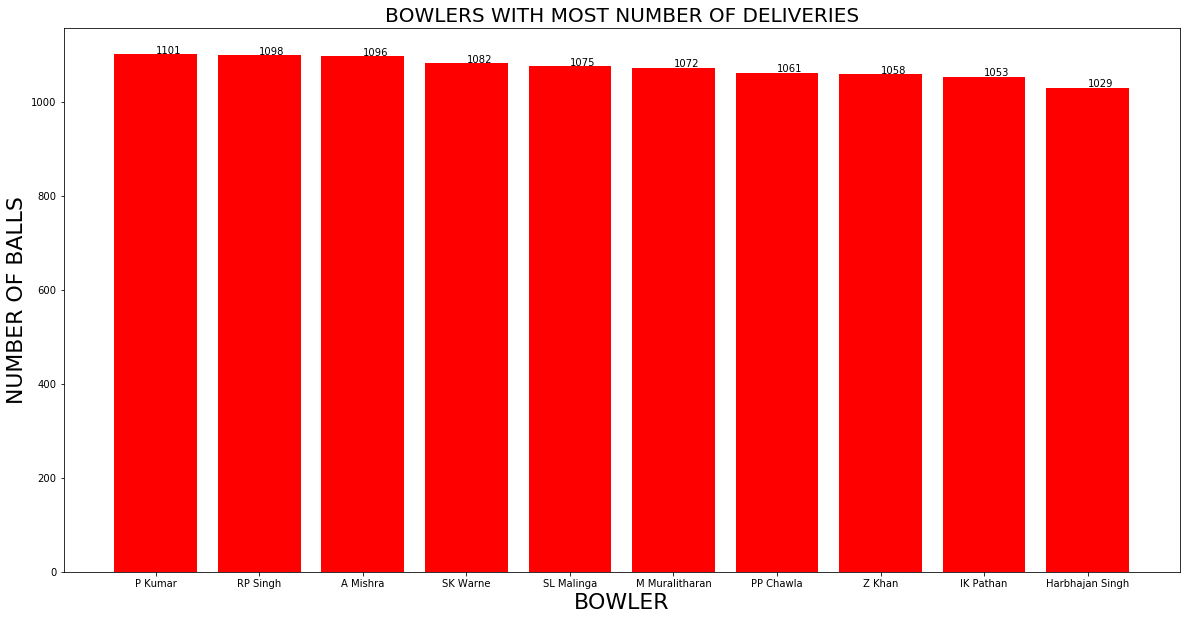

In [42]:

df = pd.merge(matches,deliveries, left_on='id', right_on='match_id')
bowler = df['bowler'].value_counts()[:10]
plt.figure(figsize=(20,10))
plt.bar(x=bowler.index, height=bowler.values,color='red')
plt.title('BOWLERS WITH MOST NUMBER OF DELIVERIES', fontsize=20)
plt.xlabel('BOWLER',fontsize=22)
plt.ylabel('NUMBER OF BALLS',fontsize=22)
for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
plt.show()

In [43]:
# OBSERVATION : HARBHAJAN SINGH HAS DELIVERED MOST NUMBER OF BALLS FOLLOWED BY A MISHRA.

THE BOWLERS WITH MOST NUMBER OF WICKETS IN IPL ARE :
               bowler  Wickets
3           A Mishra       60
194       SL Malinga       60
165         RP Singh       54
193         SK Warne       53
150          PP Ojha       52
149        PP Chawla       51
81         IK Pathan       50
240           Z Khan       50
78   Harbhajan Singh       49
142          P Kumar       46


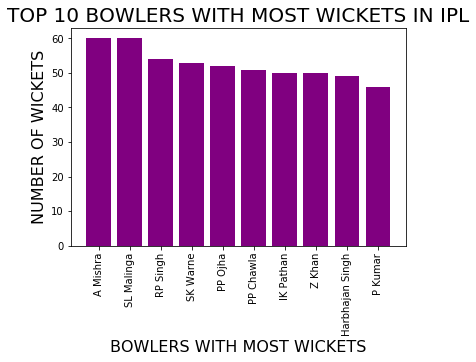

In [44]:
bowling_wickets= deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('THE BOWLERS WITH MOST NUMBER OF WICKETS IN IPL ARE :\n',top_bowlers)
plt.bar(top_bowlers['bowler'],top_bowlers['Wickets'],color='purple')
plt.xticks(rotation=90)
plt.xlabel('BOWLERS WITH MOST WICKETS',size=16)
plt.ylabel('NUMBER OF WICKETS',size=16)
plt.title('TOP 10 BOWLERS WITH MOST WICKETS IN IPL',size=20)
plt.show()

In [45]:
# OBSERVATION : SL MALINGA HAS TAKEN MOST NUMBER OF WICKETS IN IPL (170) FOLLOWED BY A MISHRA (156).

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


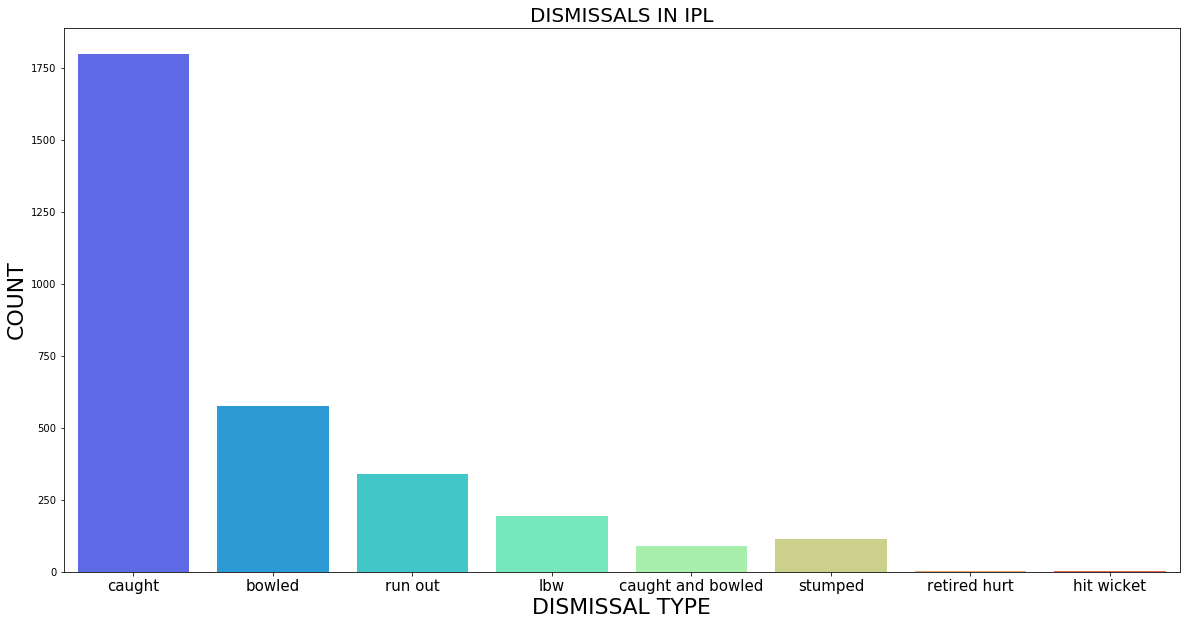

In [46]:
# HOW PLAYERS GOT DISMISSED IN IPL :-
plt.figure(figsize=(20,10))
ax=sns.countplot(deliveries.dismissal_kind,palette='rainbow')
plt.title("DISMISSALS IN IPL",fontsize=20)
plt.xlabel("DISMISSAL TYPE",fontsize=22)
plt.ylabel("COUNT",fontsize=22)
plt.xticks(rotation=0,fontsize=15)
plt.show()

In [47]:
# OBSERVATIONS : MOST BATSMEN GOT DISMISSED BY CATCHES FOLLOWED BY BOWLED.

CONCLUSION :
1) Most Successful Team In IPL : Mumbai Indians Followed By Chennai Super Kings.

2) Most Successful Player In IPL : Chris Gayle Followed By ABD Villiers.

3) Player With Most Number Of Fours : Shikhar Dhawan Followed By Suresh Raina.

4) Player With Most Number Of Sixes : Chris Gayle Followed By ABD Villiers.

5) Win Factor Based On Toss Decision : Chasing Resulted In More Number Of Wins. (CHASING - 55.4% WIN , DEFENDING - 44.6% WIN).

6) Toss Decision When Team Wins : When The Toss Is Won By A Team , It Chooses To Field First (61.2%) Than To Bat First (38.8%).

7) Win Factor In Final Match Based On Toss : The Team Winning The Toss Is More Likely To Win The Match.

8) Top Players With Most Number Of Runs In IPL : Virat Kohli Has Scored Most Number Of Runs In IPL Followed By Suresh Raina.

9) Top Bowlers With Most Deliveries In IPL : Harbhajan Singh Has Delivered Most Numbers Of Balls In IPL Followed By Amit Mishra.

10) Top Bowlers With Most Wickets In IPL : SL Malinga Has Taken Most Number Of Wickets (170) In IPL Followed By Amit Mishra (156).

11) Most Number Of Dissmisal Based On Types : Most Players Are Dismissed Due To Catch Followed By Bowled.